# Detecting Screens in an Image Using Fourier Transformations

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# from win32api import GetSystemMetrics

# def get_resized_for_display_img(img):
#     # Get screen size
#     screen_w, screen_h = GetSystemMetrics(0), GetSystemMetrics(1)
    
#     # Calculate resize factor
#     h, w, = img.shape
#     if h > screen_h or w > screen_w:
#         if h / screen_h >= w / screen_w:
#             resize_factor = screen_h / h
#         else:
#             resize_factor = screen_w / w
#         h, w = int(h * resize_factor), int(w * resize_factor)
    
#     # Resize the image
#     resized_img = cv2.resize(img, (w, h))
#     return resized_img

def fourier_transform(img):
    # Load the image
    image = cv2.imread(img, cv2.IMREAD_GRAYSCALE)

    # # Apply simple thresholding
    # threshold_value = 127 # Adjust based on your image
    # _, binary_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)
    # Apply adaptive thresholding
    # binary_image = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    # # Apply Otsu's thresholding
    # _, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # # Plot
    plt.imshow(image, cmap='gray')
    plt.title(f'Magnitude Spectrum, DFT; Image_{i}')
    plt.show()

    # # Compute the DFT
    # dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
    # # Shift the zero-frequency component to the center
    # dft_shift = np.fft.fftshift(dft)
    # # Compute the magnitude spectrum
    # magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))
    # magnitude_spectrum += np.ones(magnitude_spectrum.shape, dtype=magnitude_spectrum.dtype) # Add 1 to avoid log(0)
    # cv2.log(magnitude_spectrum, magnitude_spectrum)
    # # Normalize the logarithmic scaled image for display
    # cv2.normalize(magnitude_spectrum, magnitude_spectrum, 0, 1, cv2.NORM_MINMAX)

    # # # Plot
    # plt.imshow(magnitude_spectrum, cmap='gray')
    # plt.title(f'Magnitude Spectrum, DFT; Image_{i}')
    # plt.show()

    # print(f'Magnitude Spectrum for image_{i}: {magnitude_spectrum}')

    # Apply FFT
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift))
    # Ensure the array is contiguous
    magnitude_spectrum = np.ascontiguousarray(magnitude_spectrum, dtype=np.float32)
    # Now apply the log operation
    cv2.log(magnitude_spectrum, magnitude_spectrum)
    # Normalize the logarithmic scaled image for display
    cv2.normalize(magnitude_spectrum, magnitude_spectrum, 0, 1, cv2.NORM_MINMAX)
    # Plot
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title(f'Magnitude Spectrum, FFT; Image_{i}')
    plt.show()

    print(f'Magnitude Spectrum for image_{i}: {magnitude_spectrum}')

    # Plot Histogram of the magnitude spectrum between 0 and 1
    plt.hist(magnitude_spectrum.ravel(), 256, [0, 1])
    plt.title(f'Histogram of the Magnitude Spectrum, DFT; Image_{i}')
    plt.show()

    # Thresholding
    # Idea: Let's say if less than 10% of the pixels are above a certain threshold, 
    #       then we can say that the image is from a digital screen
    THRESHOLD = 0.8
    print(f"% above threshold ({THRESHOLD}): {np.array(magnitude_spectrum > THRESHOLD).mean() * 100}%")


### Screen Images

['forged/20240327_114621.jpg', 'forged/20240327_114449.jpg', 'forged/20240327_114754.jpg', 'forged/20240327_114750.jpg', 'forged/OnePlus-has-the-perfect-remedy-for-a-pesky-display-problem.-Will-Samsung-take-note.jpg', 'forged/20240327_114752.jpg', 'forged/20240327_114745.jpg', 'forged/20240327_114542.jpg', 'forged/20240327_114742.jpg', 'forged/main-qimg-04a21043319732a6eecef7fc5f60f440-lq.jpeg', 'forged/20240327_114735.jpg']


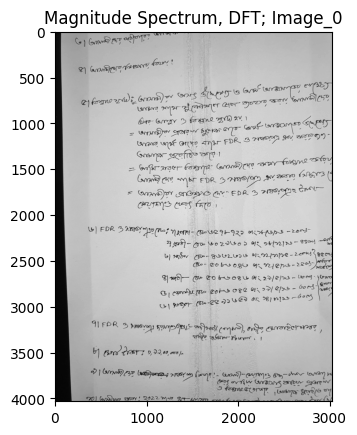

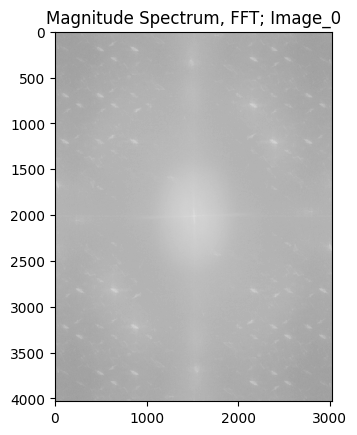

Magnitude Spectrum for image_0: [[0.768621   0.74039793 0.6840527  ... 0.69437855 0.6840527  0.74039793]
 [0.75475276 0.7454885  0.62290895 ... 0.68691397 0.69466937 0.7145588 ]
 [0.7149543  0.72563225 0.682949   ... 0.689084   0.68052316 0.7029483 ]
 ...
 [0.69886875 0.6807659  0.6889852  ... 0.6389191  0.66497386 0.6692316 ]
 [0.7149543  0.7029483  0.68052316 ... 0.5446272  0.682949   0.72563225]
 [0.75475276 0.7145588  0.69466937 ... 0.68976057 0.62290895 0.7454885 ]]


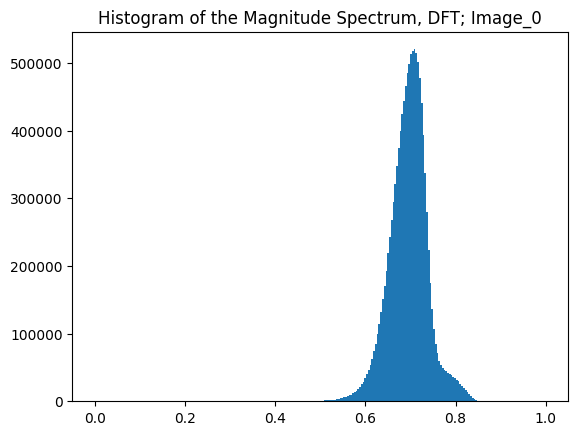

% above threshold (0.8): 1.635576105442177%


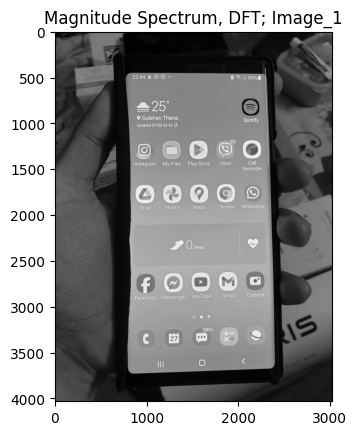

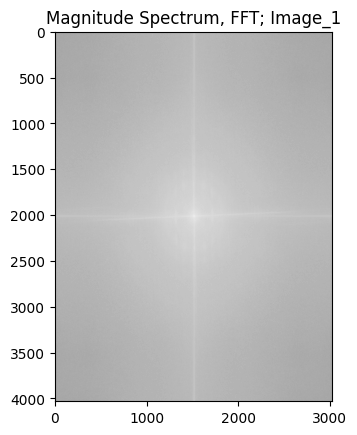

Magnitude Spectrum for image_1: [[0.68673205 0.6065041  0.663546   ... 0.67591506 0.663546   0.6065041 ]
 [0.6239719  0.6773401  0.66651297 ... 0.6883059  0.6861844  0.6601699 ]
 [0.69077414 0.66078174 0.66634136 ... 0.5516196  0.6464402  0.6586916 ]
 ...
 [0.6841499  0.6718109  0.66437507 ... 0.67219675 0.6724328  0.6512423 ]
 [0.69077414 0.6586916  0.6464402  ... 0.69611937 0.66634136 0.66078174]
 [0.6239719  0.6601699  0.6861844  ... 0.6384788  0.66651297 0.6773401 ]]


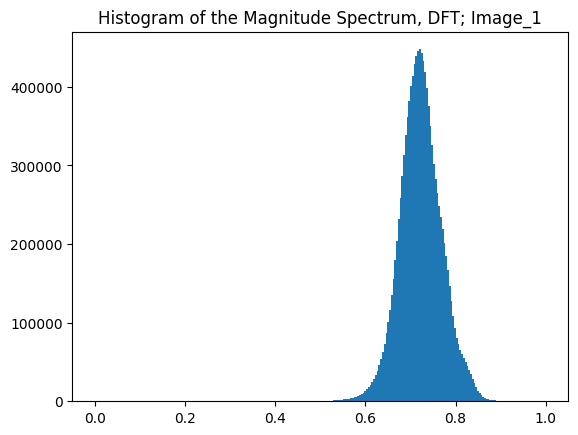

% above threshold (0.8): 5.287109539031662%


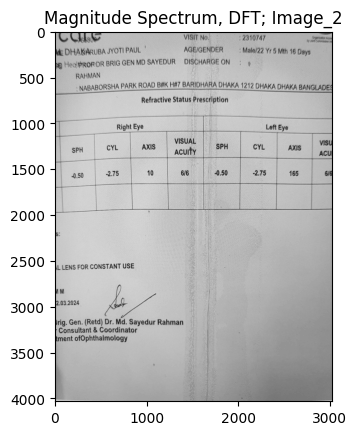

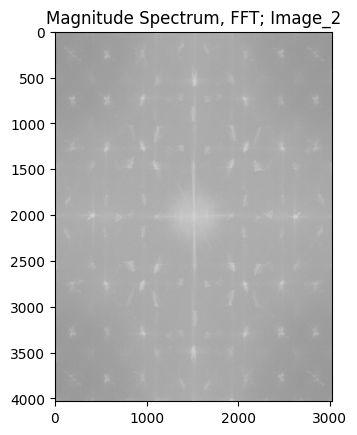

Magnitude Spectrum for image_2: [[0.621648   0.7483574  0.71150327 ... 0.70217776 0.71150327 0.7483574 ]
 [0.73966306 0.7379183  0.68493736 ... 0.6925385  0.6998046  0.7455071 ]
 [0.744227   0.7292651  0.6322071  ... 0.6525455  0.6938947  0.7199629 ]
 ...
 [0.70635676 0.69141185 0.61547226 ... 0.6491102  0.6966114  0.6459611 ]
 [0.744227   0.7199629  0.6938947  ... 0.6709597  0.6322071  0.7292651 ]
 [0.73966306 0.7455071  0.6998046  ... 0.7038558  0.68493736 0.7379183 ]]


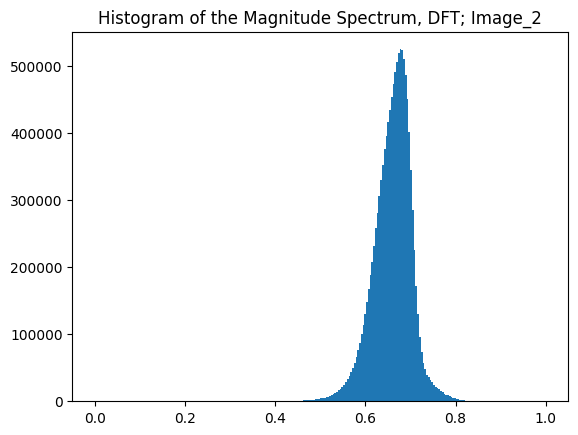

% above threshold (0.8): 0.12593530853699506%


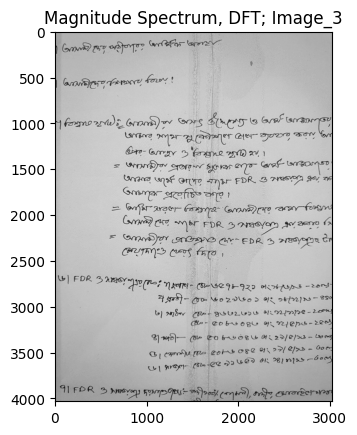

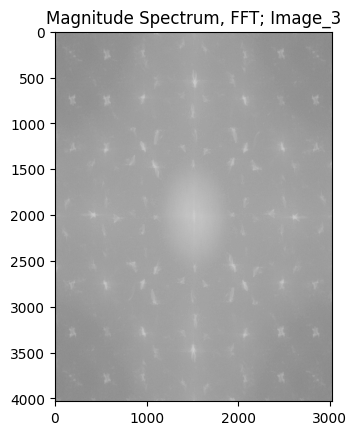

Magnitude Spectrum for image_3: [[0.6652099  0.71266747 0.58208406 ... 0.6697911  0.58208406 0.71266747]
 [0.71384877 0.6936612  0.5507347  ... 0.6557958  0.6223535  0.71403307]
 [0.7000353  0.66801107 0.6062538  ... 0.5981628  0.6121388  0.6849237 ]
 ...
 [0.61404544 0.62461174 0.62665737 ... 0.60014963 0.6419958  0.6187047 ]
 [0.7000353  0.6849237  0.6121388  ... 0.60872483 0.6062538  0.66801107]
 [0.71384877 0.71403307 0.6223535  ... 0.664376   0.5507347  0.6936612 ]]


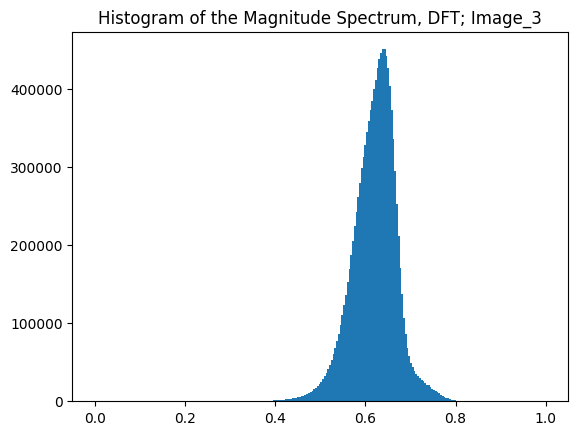

% above threshold (0.8): 0.02047935300663475%


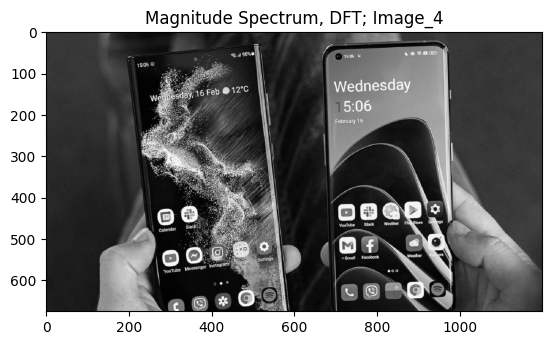

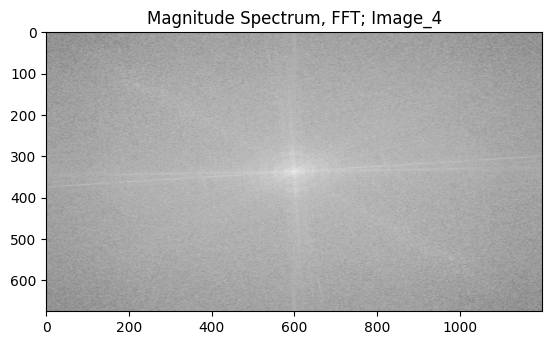

Magnitude Spectrum for image_4: [[0.56880593 0.5737297  0.52687365 ... 0.62839735 0.6068564  0.57933253]
 [0.55406463 0.51053953 0.551702   ... 0.58519644 0.5803259  0.5887967 ]
 [0.5675562  0.58599716 0.57428855 ... 0.56392425 0.5582588  0.5607554 ]
 ...
 [0.5675562  0.5607554  0.5582588  ... 0.5672245  0.57428855 0.58599716]
 [0.55406463 0.5887967  0.5803259  ... 0.516326   0.551702   0.51053953]
 [0.56880593 0.57933253 0.6068564  ... 0.5405873  0.52687365 0.5737297 ]]


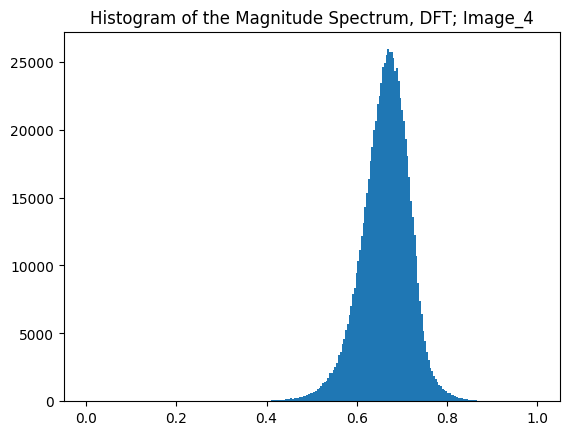

% above threshold (0.8): 0.5993827160493826%


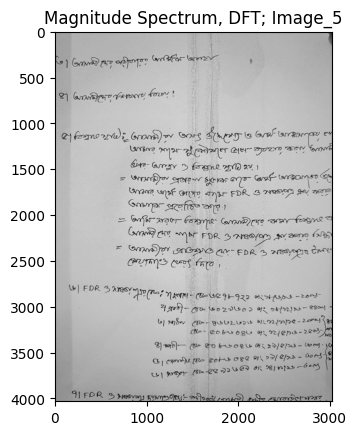

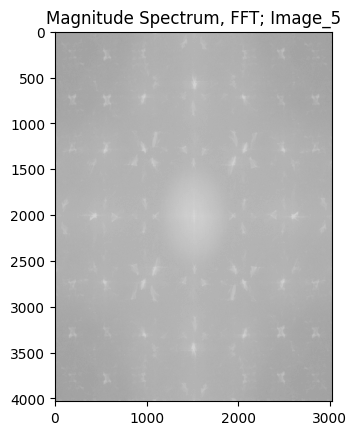

Magnitude Spectrum for image_5: [[0.7296864  0.7723061  0.73498154 ... 0.73749524 0.73498154 0.7723061 ]
 [0.7638831  0.7685583  0.6707282  ... 0.73952496 0.7239578  0.7597737 ]
 [0.76023537 0.7522927  0.68786186 ... 0.7178784  0.6824189  0.731555  ]
 ...
 [0.7251937  0.6446892  0.68412155 ... 0.6349864  0.71374214 0.7190891 ]
 [0.76023537 0.731555   0.6824189  ... 0.70385015 0.68786186 0.7522927 ]
 [0.7638831  0.7597737  0.7239578  ... 0.72073394 0.6707282  0.7685583 ]]


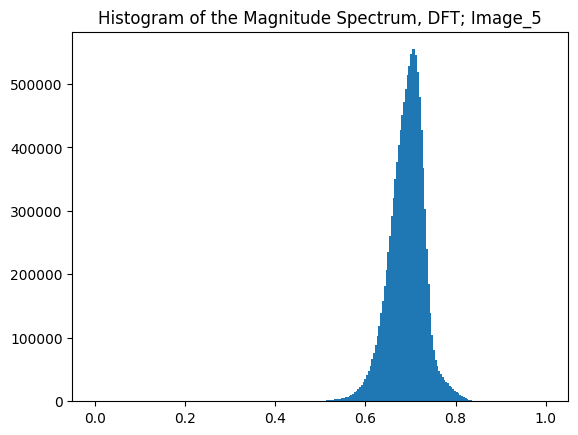

% above threshold (0.8): 0.5844858197908793%


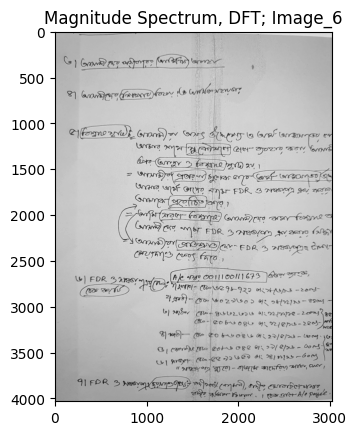

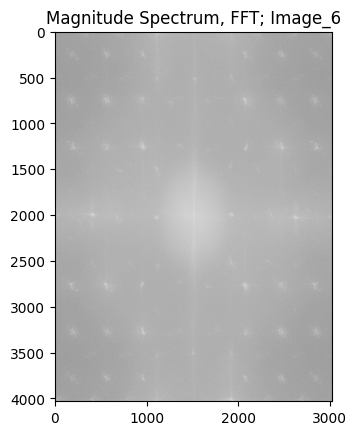

Magnitude Spectrum for image_6: [[0.69723445 0.7291884  0.7353209  ... 0.7253608  0.7353209  0.7291884 ]
 [0.72763956 0.7275222  0.73635924 ... 0.7246538  0.73521143 0.734434  ]
 [0.7331398  0.73570794 0.7339191  ... 0.71585363 0.72227716 0.73300916]
 ...
 [0.7271607  0.71483266 0.69625074 ... 0.7150968  0.7292534  0.727495  ]
 [0.7331398  0.73300916 0.72227716 ... 0.7250507  0.7339191  0.73570794]
 [0.72763956 0.734434   0.73521143 ... 0.7283663  0.73635924 0.7275222 ]]


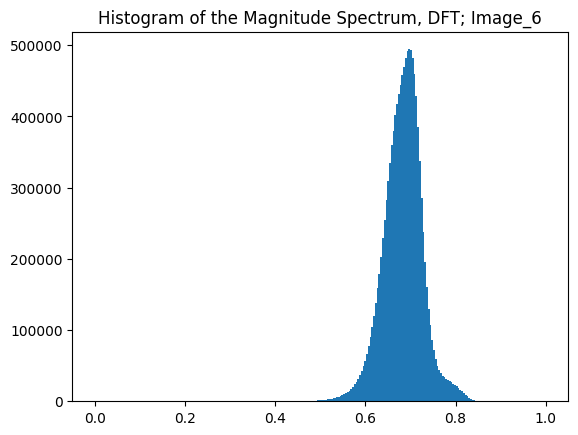

% above threshold (0.8): 0.9411890720794491%


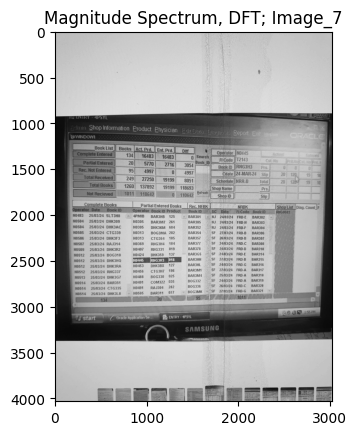

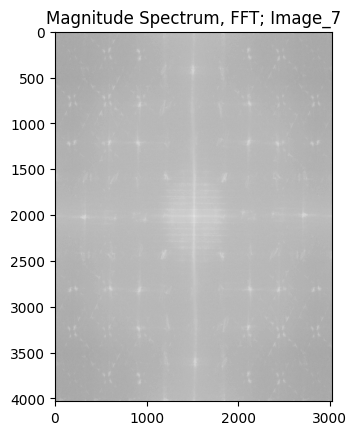

Magnitude Spectrum for image_7: [[0.76624346 0.7206764  0.7475069  ... 0.65629125 0.7475069  0.7206764 ]
 [0.7375448  0.6883852  0.7341854  ... 0.69422334 0.72793156 0.7455331 ]
 [0.75643677 0.7292646  0.70307904 ... 0.6840014  0.6732476  0.7275639 ]
 ...
 [0.7269936  0.7435027  0.6691388  ... 0.6621815  0.71259445 0.7424243 ]
 [0.75643677 0.7275639  0.6732476  ... 0.69698304 0.70307904 0.7292646 ]
 [0.7375448  0.7455331  0.72793156 ... 0.6658277  0.7341854  0.6883852 ]]


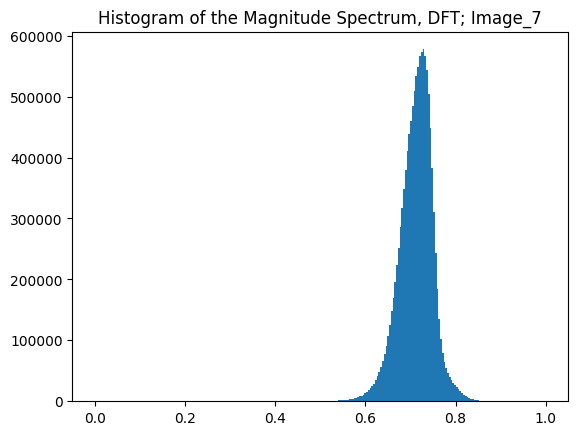

% above threshold (0.8): 1.0437744735239773%


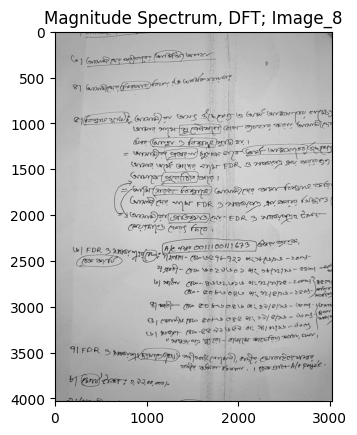

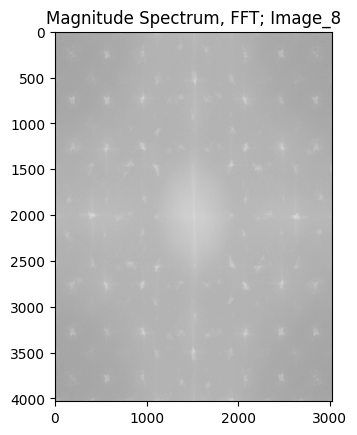

Magnitude Spectrum for image_8: [[0.7601112  0.78128415 0.74068683 ... 0.7352244  0.74068683 0.78128415]
 [0.7777176  0.7694093  0.6395461  ... 0.73409855 0.73143214 0.77043396]
 [0.76312417 0.7440918  0.6889544  ... 0.70043385 0.7088259  0.7343867 ]
 ...
 [0.6765291  0.724455   0.7309159  ... 0.69302964 0.7333111  0.7265716 ]
 [0.76312417 0.7343867  0.7088259  ... 0.70331335 0.6889544  0.7440918 ]
 [0.7777176  0.77043396 0.73143214 ... 0.72081697 0.6395461  0.7694093 ]]


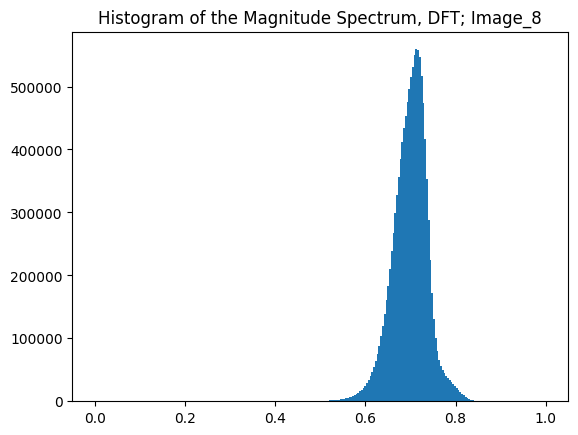

% above threshold (0.8): 0.8473137518896448%


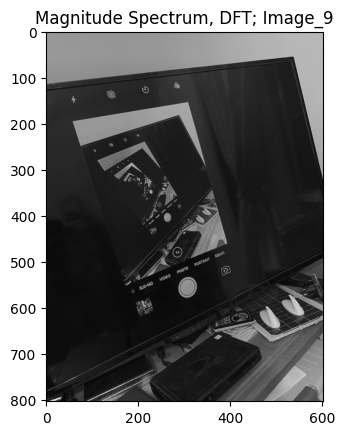

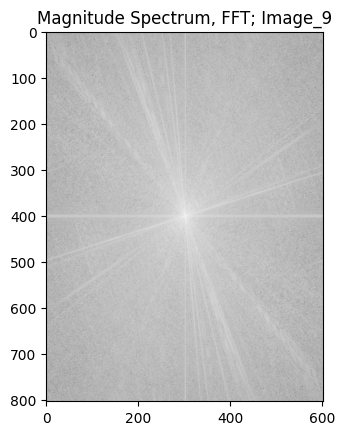

Magnitude Spectrum for image_9: [[0.6976474  0.7017861  0.7122625  ... 0.7034598  0.61188203 0.6339437 ]
 [0.707067   0.73466814 0.6997756  ... 0.6441216  0.7027048  0.56158936]
 [0.6977676  0.7021198  0.71205413 ... 0.6772579  0.6765199  0.6722638 ]
 ...
 [0.6977676  0.6722638  0.6765199  ... 0.7180879  0.71205413 0.7021198 ]
 [0.707067   0.56158936 0.7027048  ... 0.6841081  0.6997756  0.73466814]
 [0.6976474  0.6339437  0.61188203 ... 0.68307495 0.7122625  0.7017861 ]]


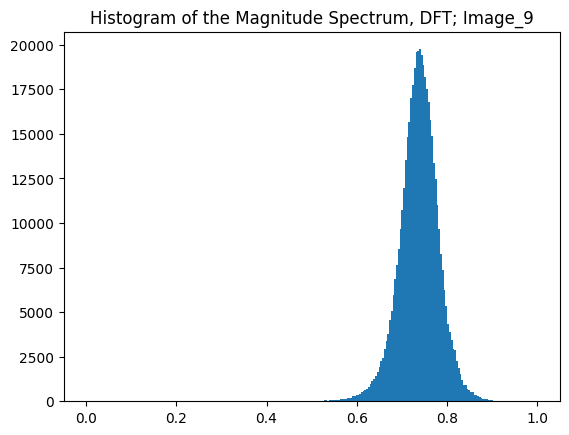

% above threshold (0.8): 6.554324935975144%


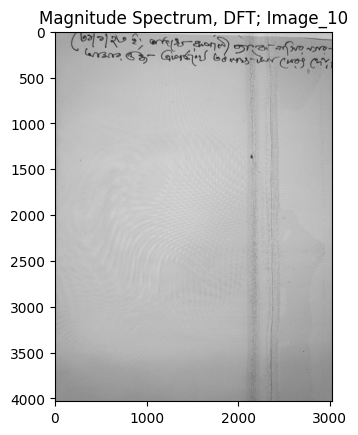

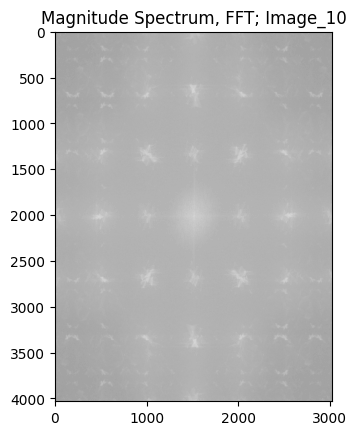

Magnitude Spectrum for image_10: [[0.7317154  0.76741797 0.717642   ... 0.7088671  0.717642   0.76741797]
 [0.7624308  0.7568     0.72886944 ... 0.69796216 0.6980109  0.7597317 ]
 [0.7582724  0.7438384  0.7341292  ... 0.5872249  0.6569394  0.7205218 ]
 ...
 [0.72051775 0.703201   0.68774384 ... 0.64344823 0.73416746 0.74542487]
 [0.7582724  0.7205218  0.6569394  ... 0.7101149  0.7341292  0.7438384 ]
 [0.7624308  0.7597317  0.6980109  ... 0.7135215  0.72886944 0.7568    ]]


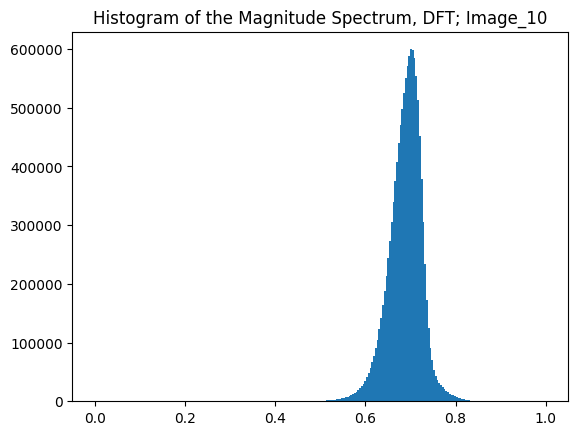

% above threshold (0.8): 0.31563792569496935%


In [2]:
# All images
screen_images = [os.path.join("forged", img) for img in os.listdir('forged')]
print(screen_images)

for i in range(len(screen_images)):
    fourier_transform(screen_images[i])

### Real Images

['real/20240327_114945.jpg', 'real/20240327_114941.jpg', 'real/20240327_114950.jpg']


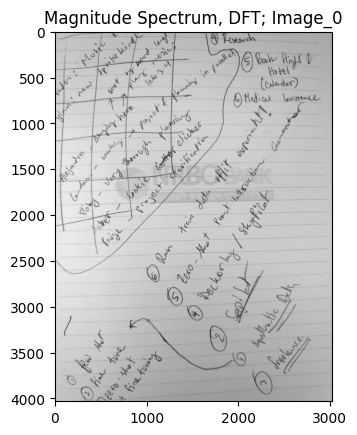

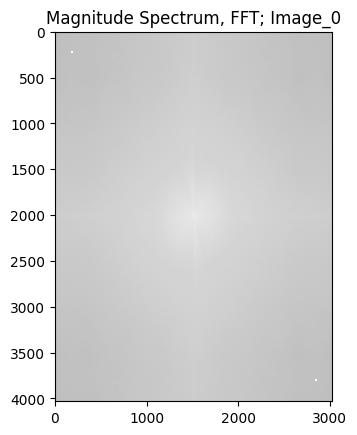

Magnitude Spectrum for image_0: [[0.805365   0.7561575  0.7722259  ... 0.75707513 0.7722259  0.7561575 ]
 [0.7507392  0.7585035  0.73294544 ... 0.7051136  0.7448543  0.70918655]
 [0.74605983 0.7052086  0.74626493 ... 0.7806781  0.74394673 0.74210376]
 ...
 [0.7621103  0.75395775 0.7632297  ... 0.7624036  0.76625866 0.754946  ]
 [0.74605983 0.74210376 0.74394673 ... 0.749162   0.74626493 0.7052086 ]
 [0.7507392  0.70918655 0.7448543  ... 0.7273209  0.73294544 0.7585035 ]]


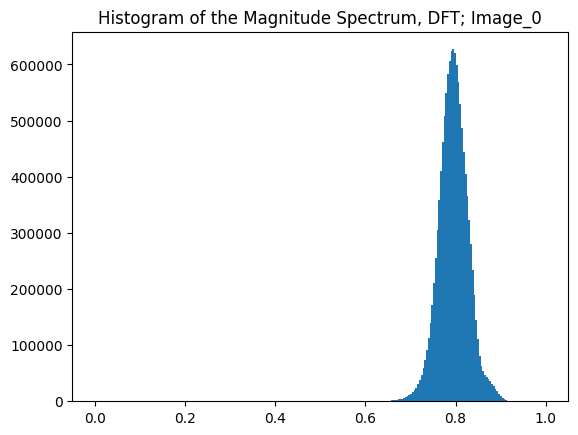

% above threshold (0.8): 43.45957374076173%


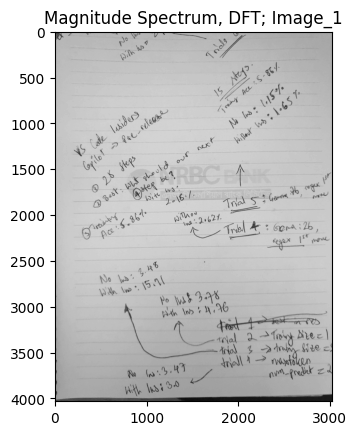

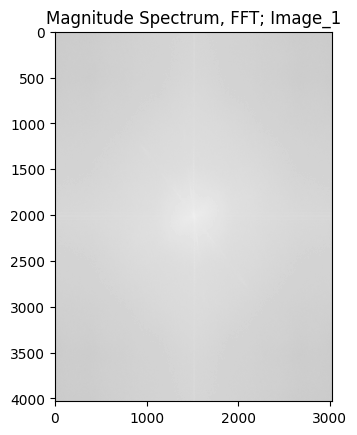

Magnitude Spectrum for image_1: [[0.8443145  0.78720003 0.8222971  ... 0.81726736 0.8222971  0.78720003]
 [0.7948243  0.8017337  0.80148226 ... 0.7969207  0.8127559  0.8109057 ]
 [0.77761006 0.7919228  0.80696094 ... 0.77373683 0.8106849  0.7662403 ]
 ...
 [0.81482637 0.8164692  0.79935735 ... 0.7792501  0.7867704  0.7962851 ]
 [0.77761006 0.7662403  0.8106849  ... 0.7656822  0.80696094 0.7919228 ]
 [0.7948243  0.8109057  0.8127559  ... 0.79156506 0.80148226 0.8017337 ]]


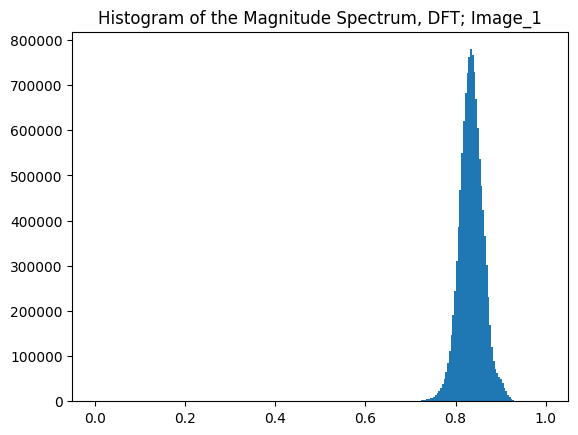

% above threshold (0.8): 91.72622656315612%


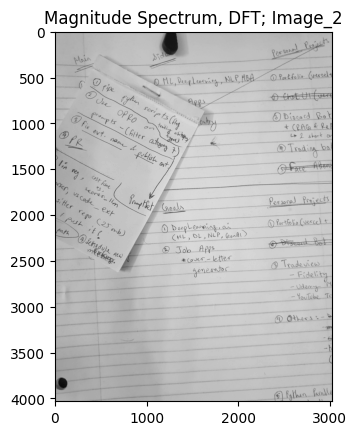

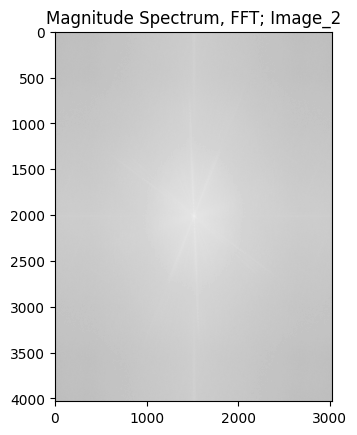

Magnitude Spectrum for image_2: [[0.78677535 0.75231594 0.7602743  ... 0.7658546  0.7602743  0.75231594]
 [0.76524395 0.73927784 0.7578119  ... 0.7409495  0.75390416 0.7701998 ]
 [0.7564998  0.7709285  0.7623025  ... 0.76903594 0.74828386 0.68818325]
 ...
 [0.7461973  0.7554496  0.75566775 ... 0.76647824 0.7385234  0.760793  ]
 [0.7564998  0.68818325 0.74828386 ... 0.7456169  0.7623025  0.7709285 ]
 [0.76524395 0.7701998  0.75390416 ... 0.7736857  0.7578119  0.73927784]]


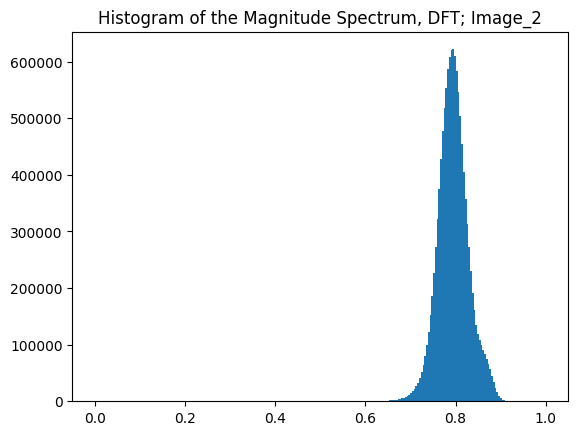

% above threshold (0.8): 41.95752760980936%


In [3]:
# All images
real_images = [os.path.join("real", img) for img in os.listdir('real')]
print(real_images)

for i in range(len(real_images)):
    fourier_transform(real_images[i])